In [92]:
import os
import matplotlib.pyplot as plt
import numpy as np
import csv
from src.feature_extractor import compute_mel_features, compute_stft_features

In [93]:
# Transform parameters
options_mel = {
    "frame_length" : 32, #ms
    "frame_shift" : 4, #ms
    "window_type" : "hamming",
    "num_mel_bins" : 129,
    "channel" : 0}

options_stft = {
    "frame_length" : 16, #ms
    "frame_shift" : 8, #ms
    "window_type" : "hamming",
    "channel" : 0}

In [94]:
# Example file path
control = "data/torgo_control.wav"
folder = "data/"

## Functions

In [95]:
def divide_audio(feats, options):
    """
    Divides spectrogram into 500 ms chunks

    :param feats: the spectrogram extraction
    :param options: the spectrogram options
    :return: a list of 500 ms chunks of the spectrogram
    """
    nb_frames_in_audio = feats.shape[1]
    nb_frames_per_chunk = int(chunk_length*nb_frames_in_audio / (options["frame_shift"]*(nb_frames_in_audio-1) + options["frame_length"]))
    
    i = 0
    chunks = []
    while ((i+1)*nb_frames_per_chunk < nb_frames_in_audio): # while there still exists another extra 500 ms chunk
        chunks.append(feats[:, i*nb_frames_per_chunk:(i+1)*nb_frames_per_chunk]) # append next chunk of 500 ms
        i += 1
        
    return chunks

def standardize(chunk):
    """
    Standardizes a chunk 

    :param chunk: a chunk of spectrogram
    :return: that chunk, standardized
    """ 
    return (chunk-chunk.mean())/(chunk.std())

### Spectrogram extraction

In [96]:
# Extract mel spectrograms 
ex_mel_feats = compute_mel_features(control,options_mel)
# Extract STFT spectrograms
ex_stft_feats = compute_stft_features(control,options_stft)
print(ex_mel_feats.shape)
print(ex_stft_feats.shape)

(129, 818)
(129, 411)


### MEL chunk computations

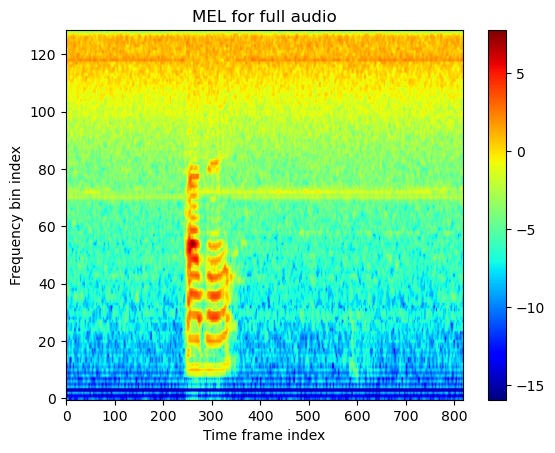

In [97]:
plt.imshow(ex_mel_feats, cmap='jet', aspect='auto', origin="lower")
plt.colorbar()
plt.title('MEL for full audio')
plt.xlabel('Time frame index')
plt.ylabel('Frequency bin index')
plt.show()

In [98]:
ex_mel_chunks = divide_audio(ex_mel_feats, options_mel)
print(np.array(ex_mel_chunks).shape)

(6, 129, 123)


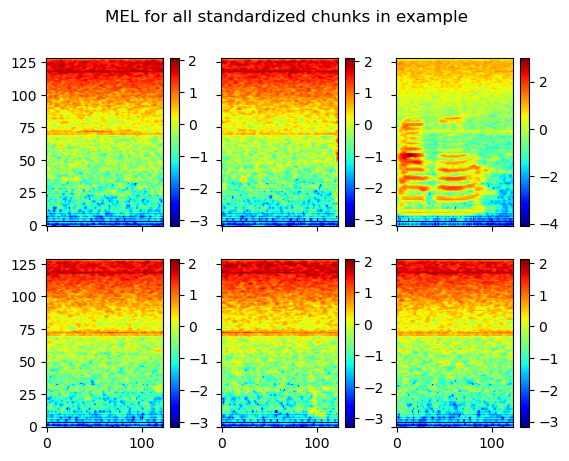

In [99]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

for col in range(2):
    for row in range(3):
        std = standardize(ex_mel_chunks[row + 3*col])
        graph = axs[col, row].imshow(std, cmap='jet', aspect='auto', origin="lower")
        fig.colorbar(graph, ax=axs[col, row])

fig.suptitle('MEL for all standardized chunks in example')
plt.show()

### STFT chunk computations

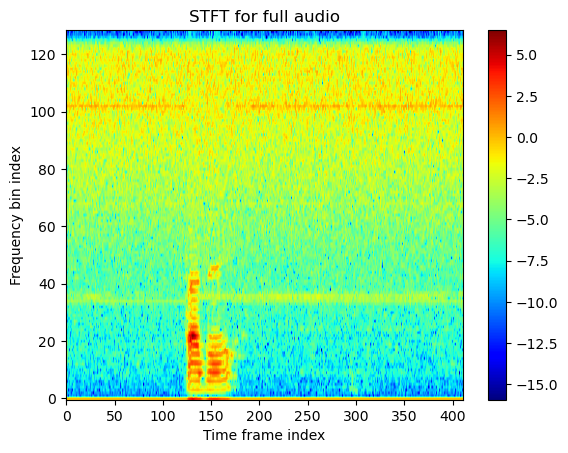

In [100]:
plt.imshow(ex_stft_feats, cmap='jet', aspect='auto', origin='lower')
plt.colorbar()
plt.title('STFT for full audio')
plt.xlabel('Time frame index')
plt.ylabel('Frequency bin index')
plt.show()

In [101]:
ex_stft_chunks = divide_audio(ex_stft_feats, options_stft)
print(np.array(ex_stft_chunks).shape)

(6, 129, 62)


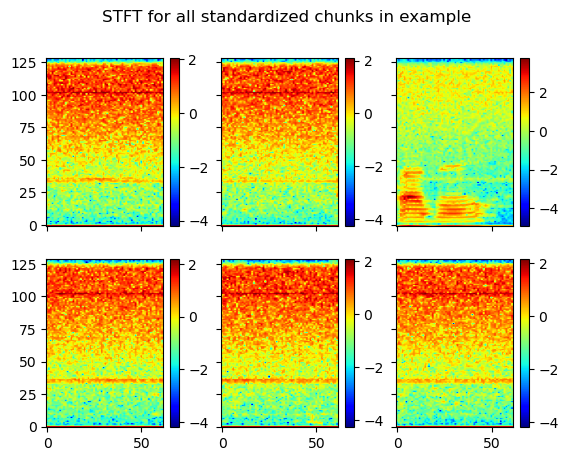

In [102]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

for col in range(2):
    for row in range(3):
        std = standardize(ex_stft_chunks[row + 3*col])
        graph = axs[col, row].imshow(std, cmap='jet', aspect='auto', origin="lower")
        fig.colorbar(graph, ax=axs[col, row])

fig.suptitle('STFT for all standardized chunks in example')
plt.show()

### Save standardized chunks to file system

In [79]:
for i in range(len(ex_mel_chunks)): # mel
        chunk_filename = f'mel_{control[5:-4]}_chunk_{i}.csv' # get rid of '.wav' in original filename
        std = standardize(ex_mel_chunks[i])
        np.savetxt(f'{folder}{chunk_filename}', std, delimiter=",")
        
for j in range(len(ex_stft_chunks)): # stft
        chunk_filename = f'stft_{control[5:-4]}_chunk_{j}.csv' # get rid of '.wav' in original filename
        std = standardize(ex_stft_chunks[i])
        np.savetxt(f'{folder}{chunk_filename}', std, delimiter=",")

### Make sure we can read back the csvs

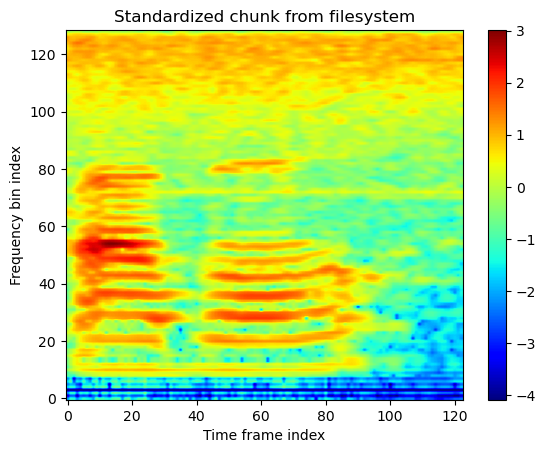

In [103]:
files = os.listdir(folder)
chunk = np.genfromtxt(folder + files[2], delimiter=',')

plt.imshow(chunk, cmap='jet', aspect='auto', origin='lower')
plt.colorbar()
plt.title('Standardized chunk from filesystem')
plt.xlabel('Time frame index')
plt.ylabel('Frequency bin index')
plt.show()